In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Data Wrangling

In [2]:
df = pd.read_csv('FTIR_Spectra_olive_oils.csv')

In [3]:
df.head()

,Sample Number:,1,1.1,2,2.1,3,3.1,4,4.1,5,...,56,56.1,57,57.1,58,58.1,59,59.1,60,60.1
0,Group Code:,1,1,1,1,1,1,1,1,1,...,4,4,4,4,4,4,4,4,4,4
1,Wavenumbers,Greece,Greece,Greece,Greece,Greece,Greece,Greece,Greece,Greece,...,Spain,Spain,Spain,Spain,Spain,Spain,Spain,Spain,Spain,Spain
2,798.892,0.127523009,0.126498181,0.130411785,0.130022227,0.128601989,0.128217254,0.126174933,0.126466053,0.127060105,...,0.128081486,0.127703821,0.127753276,0.12689499,0.126701768,0.126685314,0.130538546,0.128416816,0.13099101,0.130263968
3,800.8215,0.127949615,0.127130974,0.130675401,0.130406662,0.128789565,0.128282253,0.126732773,0.126915413,0.127551128,...,0.128827468,0.128164684,0.127986509,0.12721772,0.127097751,0.127238698,0.130680936,0.128996456,0.131317107,0.130737854
4,802.751,0.129282219,0.128510777,0.13201661,0.132018029,0.130022276,0.129636635,0.128243765,0.128254118,0.128899981,...,0.130061537,0.129522343,0.129284594,0.128557439,0.128209423,0.128392346,0.131650943,0.130232478,0.132793931,0.131845175


In [4]:
df_new = df.copy()

df_new.columns = df_new.iloc[0,:]
df_new = df_new.drop([0,1], axis = 0)
df_new.head()

,Group Code:,1,1,1,1,1,1,1,1,1,...,4,4,4,4,4,4,4,4,4,4
2,798.892,0.127523009,0.126498181,0.130411785,0.130022227,0.128601989,0.128217254,0.126174933,0.126466053,0.127060105,...,0.128081486,0.127703821,0.127753276,0.12689499,0.126701768,0.126685314,0.130538546,0.128416816,0.13099101,0.130263968
3,800.8215,0.127949615,0.127130974,0.130675401,0.130406662,0.128789565,0.128282253,0.126732773,0.126915413,0.127551128,...,0.128827468,0.128164684,0.127986509,0.12721772,0.127097751,0.127238698,0.130680936,0.128996456,0.131317107,0.130737854
4,802.751,0.129282219,0.128510777,0.13201661,0.132018029,0.130022276,0.129636635,0.128243765,0.128254118,0.128899981,...,0.130061537,0.129522343,0.129284594,0.128557439,0.128209423,0.128392346,0.131650943,0.130232478,0.132793931,0.131845175
5,804.6805,0.131174169,0.13033991,0.133824061,0.134007275,0.132011866,0.13179863,0.129892728,0.129958259,0.13060904,...,0.132067174,0.131409352,0.131377283,0.130835335,0.130052637,0.130235814,0.133165449,0.131678874,0.134692443,0.133646145
6,806.61,0.133590328,0.132527221,0.136095296,0.136270568,0.134426627,0.134061476,0.131754598,0.132067191,0.132955794,...,0.134597123,0.133865584,0.133797813,0.133400675,0.13263851,0.132905029,0.135276914,0.133639673,0.136772719,0.13595365


In [5]:
# Country labels
# 1: Greece, 2: Italy, 3: Portugal, 4: Spain
df_new = df_new.set_index('Group Code:')
df_new.index.name = 'Wavenumbers'
df_new = df_new.T
df_new.index.name = 'country'

df_new = df_new.reset_index()

df_new.head()

Wavenumbers,country,798.892,800.8215,802.751,804.6805,806.61,808.5395,810.469,812.3985,814.328,...,1879.442,1881.3715,1883.301,1885.2305,1887.16,1889.0895,1891.019,1892.9485,1894.878,1896.8085
0,1,0.127523009,0.127949615,0.129282219,0.131174169,0.133590328,0.136425525,0.139357827,0.142219257,0.144805465,...,0.012651698,0.012395061,0.012269212,0.012279331,0.012158004,0.011884137,0.0117163,0.01158336,0.011314732,0.011303856
1,1,0.126498181,0.127130974,0.128510777,0.13033991,0.132527221,0.135308508,0.13835292,0.141150062,0.143630181,...,0.006671552,0.006593855,0.006546366,0.006467273,0.006222991,0.005719519,0.005517707,0.005493693,0.005320967,0.005425721
2,1,0.130411785,0.130675401,0.13201661,0.133824061,0.136095296,0.138943757,0.141722779,0.144135649,0.146431382,...,0.007770304,0.007493235,0.007512066,0.007548361,0.007391299,0.007176312,0.006843001,0.006551175,0.006398361,0.006582107
3,1,0.130022227,0.130406662,0.132018029,0.134007275,0.136270568,0.13887477,0.141481132,0.144074918,0.1465531,...,0.00638985,0.00636873,0.006195603,0.006059399,0.005933497,0.005507195,0.005346649,0.005348955,0.005132594,0.005222186
4,1,0.128601989,0.128789565,0.130022276,0.132011866,0.134426627,0.137069766,0.139645656,0.142338207,0.144923244,...,0.011095052,0.010937818,0.010816704,0.010593569,0.010379484,0.010287073,0.010126793,0.009965776,0.009759838,0.00964871


In [6]:
# Extract x matrix and ylabels
xdata = df_new.iloc[:,1:].values.astype(float)
ydata = df_new.iloc[:,0].astype(int)

In [7]:
# Split data into samples from Greece, Italy, Portugal and Spain respectively
# 1: Greece, 2: Italy, 3: Portugal, 4: Spain
xdata_greece = xdata[ydata.index[ydata==1]]
xdata_italy = xdata[ydata.index[ydata==2]]
xdata_portugal = xdata[ydata.index[ydata==3]]
xdata_spain = xdata[ydata.index[ydata==4]]

In [8]:
# Average the spectra within each classes
xdata_greece_mean = np.mean(xdata_greece, axis=0)
xdata_italy_mean = np.mean(xdata_italy, axis=0)
xdata_portugal_mean = np.mean(xdata_portugal, axis=0)
xdata_spain_mean = np.mean(xdata_spain, axis=0)

## 2. Data Visualization

#### Plot comparison of olive oils from different countries

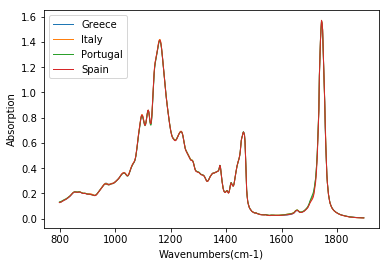

In [9]:
# Plot spectra overlay of olive oil samples from different countries
plt.plot(df_new.columns[1:], xdata_greece_mean, label = 'Greece', linewidth = 1)
plt.plot(df_new.columns[1:], xdata_italy_mean, label = 'Italy', linewidth = 1)
plt.plot(df_new.columns[1:], xdata_portugal_mean, label = 'Portugal', linewidth = 1)
plt.plot(df_new.columns[1:], xdata_spain_mean, label = 'Spain', linewidth = 1)
plt.legend(loc = 'best')
plt.ylabel('Absorption')
plt.xlabel('Wavenumbers(cm-1)')
plt.savefig('1.png')

In [10]:
# Plot interactive overlay graph using Plotly

import plotly.offline as py
import plotly.graph_objs as go
from plotly import tools
py.init_notebook_mode(connected=True)

data1 = go.Scatter(x = df_new.columns[1:], y =  xdata_greece_mean, line = dict(color = 'green'), name = 'Greece')
data2 = go.Scatter(x = df_new.columns[1:], y = xdata_italy_mean, line = dict(color = 'red'), name = 'Italy')
data3 = go.Scatter(x = df_new.columns[1:], y = xdata_portugal_mean, line = dict(color = 'blue'), name = 'Portugal')
data4 = go.Scatter(x = df_new.columns[1:], y = xdata_spain_mean, line = dict(color = 'yellow'), name = 'Spain')
layout = go.Layout(title = 'Comparison of Olive Oils from Greece, Italy, Portugal and Spain',
                  xaxis = dict(title = 'WaveNumbers(cm-1)'),
                  yaxis = dict(title = 'Absorption'))
fig = dict(data = [data1, data2, data3, data4], layout = layout)
py.iplot(fig)

#### Project samples into first two principal components space to view high-dimensional data 

In [11]:
from sklearn.decomposition import PCA

pca = PCA()
xdata_transform = pca.fit_transform(xdata)

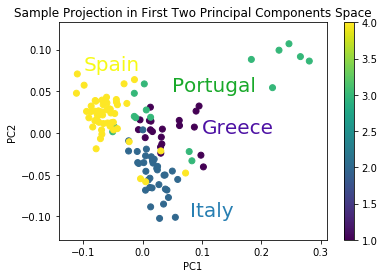

In [12]:
# 1: Greece, 2: Italy, 3: Portugal, 4: Spain
plt.scatter(xdata_transform[:,0], xdata_transform[:,1], c = ydata)
plt.annotate('Greece', xy = [0.1,0],xytext=[0.1,0], color = '#4D11A4', size = 20)
plt.annotate('Italy', xy = [0.08,-0.1],xytext=[0.08,-0.1], color = '#277FB2', size = 20)
plt.annotate('Portugal', xy = [0.05,0.05],xytext=[0.05,0.05], color = '#19A92A', size = 20)
plt.annotate('Spain', xy = [-0.1, 0.075],xytext=[-0.1, 0.075], color = '#F6FA17', size = 20)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Sample Projection in First Two Principal Components Space')
plt.colorbar()
plt.savefig('Sample distribution.png')

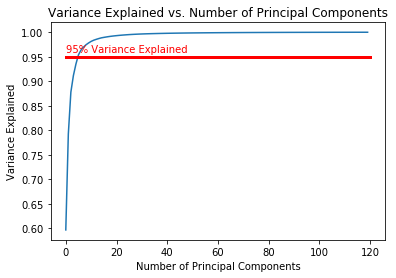

In [13]:
# Variance Expalined vs. Number of principal components. It needs 6 principal components to explain more than 95% sample variance

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.plot([0,120],[0.95, 0.95], color = 'red', linewidth = 3)
plt.annotate('95% Variance Explained', xy = [0,0.95], xytext = [0,0.96], color='red')
plt.xlabel('Number of Principal Components')
plt.ylabel('Variance Explained')
plt.title('Variance Explained vs. Number of Principal Components')
plt.savefig('Variance vs number of principal components.png')

## 3. Modeling and Prediction

In [14]:
# Define method to generate report of model performance
from sklearn.metrics import accuracy_score, confusion_matrix
def report(model, y, predict):
    print('Report of ' + model)
    print('=================================================================================')
    print('Accuracy of the model:{}'.format(accuracy_score(y, predict)))
    print('Confusion Matrix:')
    print(confusion_matrix(y, predict))

#### SVC 

In [15]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [16]:
# Compute prediction accuracy using 1 to 20 principal components and store the results in score list
score = []
for i in range (1,20):
    xtrain, xtest, ytrain, ytest = train_test_split(xdata_transform[:,:i], ydata, test_size = 0.3, random_state = 3)
    pipeline = make_pipeline(StandardScaler(), SVC())
    param = {'svc__gamma': 10.0**np.arange(-3,3),'svc__C': 10.0**np.arange(-3,3)}
    gs_svc = GridSearchCV(pipeline, param_grid=param)
    gs_svc.fit(xtrain, ytrain)
    score.append(gs_svc.score(xtest, ytest))

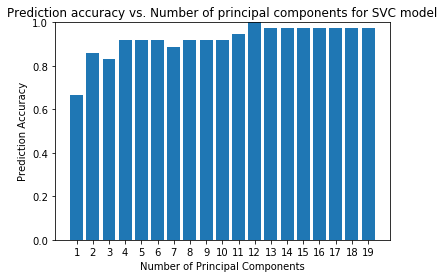

In [17]:
# Plot Prediction accuracy vs. Number of principal components
plt.bar(range(1,20),score)
_ = plt.xticks(range(1,20,1))
plt.ylim(0,1)
plt.ylabel('Prediction Accuracy')
plt.xlabel('Number of Principal Components')
plt.title('Prediction accuracy vs. Number of principal components for SVC model')

In [18]:
# Use first 12 principal components for prediction
xtrain, xtest, ytrain, ytest = train_test_split(xdata_transform[:,:12], ydata, test_size = 0.3, random_state = 3)
pipeline = make_pipeline(StandardScaler(), SVC())
param = {'svc__gamma': 10.0**np.arange(-3,3),'svc__C': 10.0**np.arange(-3,3)}
gs_svc = GridSearchCV(pipeline, param_grid=param)
gs_svc.fit(xtrain, ytrain)
svc_predict = gs_svc.predict(xtest)
report('SVC', ytest, svc_predict)

Report of SVC
Accuracy of the model:1.0
Confusion Matrix:
[[ 8  0  0  0]
 [ 0  7  0  0]
 [ 0  0  2  0]
 [ 0  0  0 19]]


#### KNN

In [19]:
# Tune n_neighbors using GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
param = {'n_neighbors':range(1,20)}
gs_knn = GridSearchCV(KNeighborsClassifier(),param_grid=param)
gs_knn.fit(xtrain, ytrain)

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': range(1, 20)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=0)

In [20]:
# Compute prediction accuracy using different number of principal components
score_knn = []
for i in range (1,20):
    xtrain, xtest, ytrain, ytest = train_test_split(xdata_transform[:,:i], ydata, test_size = 0.3, random_state = 3)
    param = {'n_neighbors':range(1,20)}
    gs_knn = GridSearchCV(KNeighborsClassifier(),param_grid=param)
    gs_knn.fit(xtrain, ytrain)
    score_knn.append(gs_knn.score(xtest, ytest))


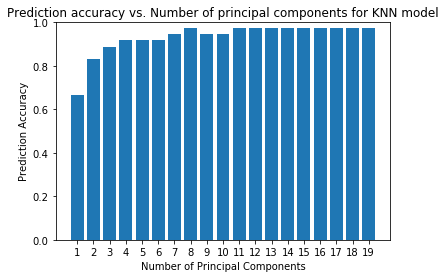

In [21]:
# Plot Prediction accuracy vs. Number of principal components
plt.bar(range(1,20),score_knn)
_ = plt.xticks(range(1,20,1))
plt.ylim(0,1)
plt.ylabel('Prediction Accuracy')
plt.xlabel('Number of Principal Components')
plt.title('Prediction accuracy vs. Number of principal components for KNN model')

In [22]:
# Use first 12 principal components to train and predict
xtrain, xtest, ytrain, ytest = train_test_split(xdata_transform[:,:12], ydata, test_size = 0.3, random_state = 3)
param = {'n_neighbors':range(1,20)}
gs_knn = GridSearchCV(KNeighborsClassifier(),param_grid=param)
gs_knn.fit(xtrain, ytrain)
score_knn.append(gs_knn.score(xtest, ytest))

In [23]:
# Generate report of KNN methods
knn_predict = gs_knn.predict(xtest)

report('KNN', ytest, knn_predict)

Report of KNN
Accuracy of the model:0.9722222222222222
Confusion Matrix:
[[ 8  0  0  0]
 [ 0  7  0  0]
 [ 0  0  2  0]
 [ 0  1  0 18]]


#### Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier
param = {'n_estimators': 10**np.arange(3), 'max_features': ['auto','sqrt','log2']}
gs_rf = GridSearchCV(RandomForestClassifier(), param_grid=param)
gs_rf.fit(xtrain, ytrain)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': array([  1,  10, 100], dtype=int32), 'max_features': ['auto', 'sqrt', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [25]:
# Predict using the best parameters and generate the model performance report
rf_predict = gs_rf.predict(xtest)

report('RF', ytest, rf_predict)

Report of RF
Accuracy of the model:0.8888888888888888
Confusion Matrix:
[[ 7  1  0  0]
 [ 0  7  0  0]
 [ 0  0  1  1]
 [ 0  2  0 17]]


## 4. Random Forest for selection of important features by feature elimination

In [26]:
# Use random forest algorithm to fit the data
rf = RandomForestClassifier()
rf.fit(xdata,ydata)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

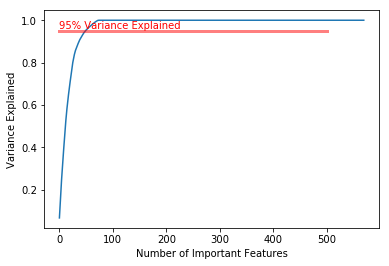

In [27]:
# Plot Variance Explained vs. Number of Important Features
plt.plot(np.cumsum(np.sort(rf.feature_importances_)[::-1]))
plt.plot([0,500],[0.95,0.95], linewidth = 3, color = 'red', alpha = 0.5)
plt.annotate('95% Variance Explained', xy=(0,0.96), xytext=(0,0.96), color = 'r')
plt.xlabel('Number of Important Features')
plt.ylabel('Variance Explained')

In [28]:
# Number of important features needed to explain 95% of variance
np.sum(np.sort(rf.feature_importances_)[::-1][:60])

0.97533912333135175

In [29]:
important_index = np.argsort(rf.feature_importances_)[::-1][:10]

In [30]:
# Key wavenumbers to determine the origin country of olive oils
key_difference = df_new.columns[1:][important_index]
key_difference

Index(['1715.4285', '1734.7245', '1728.936', '1217.6005', '1277.417',
       '1730.8655', '1198.3055', '972.548', '1215.671', '1092.179'],
      dtype='object', name='Wavenumbers')

In [31]:
xdata_greece.shape

(20, 570)

In [32]:
xdata_italy.shape

(34, 570)

In [33]:
xdata_portugal.shape

(16, 570)

In [34]:
xdata_spain.shape

(50, 570)

In [39]:
np.sum(pca.explained_variance_ratio_[:6])

0.95396243998237673